# Graphs and Maps

#### Data Wrangling to prepare for Visualization

In [188]:
import pandas as pd
File = pd.read_csv("Canada Immi.csv")
Immi_Canada = pd.DataFrame(File)
Immi_Canada.drop(columns = "Unnamed: 0", axis=1, inplace = True)

In [190]:
Immi_Canada.columns
#Its a time-series data! Its first time we are dealing with time-series data, and there shall be some syntax challenges

Index(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013'],
      dtype='object')

In [191]:
Immi_Canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

In [194]:
Immi_Canada.drop(columns = ['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [195]:
Immi_Canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

In [196]:
Immi_Canada["Total"] = Immi_Canada.sum(axis = 1, numeric_only = True) #Summing across the rows for time series data of
                                                                      # numeric type
Immi_Canada.head()


,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [197]:
Immi_Canada.isna().sum() #Checking for null data if present

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [198]:
# Let's index the country to ease querying our data 
Immi_Canada.set_index("Country", inplace = True)

In [199]:
#Creating a sub-dataframe that can call all years at once
Column_names = Immi_Canada.columns.to_list()
for i, values in enumerate(Column_names):
    print(i, values)
    

0 Continent
1 Region
2 DevName
3 1980
4 1981
5 1982
6 1983
7 1984
8 1985
9 1986
10 1987
11 1988
12 1989
13 1990
14 1991
15 1992
16 1993
17 1994
18 1995
19 1996
20 1997
21 1998
22 1999
23 2000
24 2001
25 2002
26 2003
27 2004
28 2005
29 2006
30 2007
31 2008
32 2009
33 2010
34 2011
35 2012
36 2013
37 Total


In [200]:
Years = Immi_Canada.iloc[:, 3:37]
Years.columns

Index(['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988',
       '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013'],
      dtype='object')

In [201]:
#Just attempting some basic querrying
Immi_Canada[(Immi_Canada["Continent"] == "Asia") & (Immi_Canada["DevName"] == "Developed regions")] 

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Japan,Asia,Eastern Asia,Developed regions,701,756,598,309,246,198,248,...,1067,1212,1250,1284,1194,1168,1265,1214,982,27707


In [202]:
#Turns out japan did not had increasing number people going to Canada throughout the year. so we can sort out to 
#asced years with highest immigration volume
All_numeric = Immi_Canada.drop(columns = ["Continent", "Region", "DevName", "Total"], axis = 1) 
All_numeric.loc["Japan"].sort_values(ascending = False, axis  = 0) #axis = 0 is the only to run the sorting through the 
                                                                   #rows and not the column

2008    1284
2011    1265
2007    1250
2012    1214
2006    1212
2009    1194
2010    1168
2001    1092
1999    1083
2005    1067
2000    1010
1996     994
2013     982
2004     973
1994     956
1997     924
1993     907
1998     897
1995     826
2003     817
2002     806
1981     756
1980     701
1992     605
1982     598
1991     506
1989     494
1987     422
1990     379
1988     324
1983     309
1986     248
1984     246
1985     198
Name: Japan, dtype: int64

### Data Visualization

In [210]:
Haiti = All_numeric.loc["Haiti"]

#### Line Plot
Line plots are useful to depict trend across a time

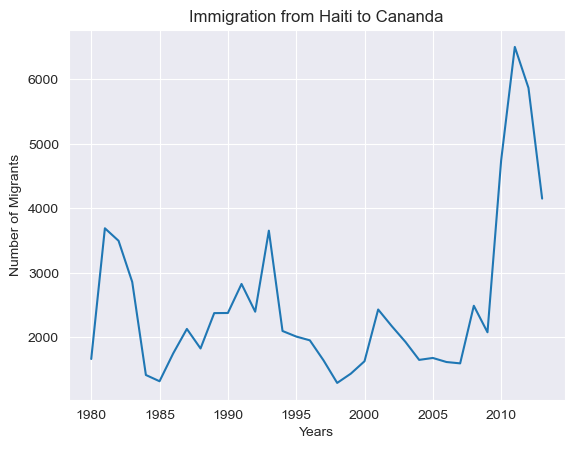

In [212]:
#Now plotting immigration pattern from Haiti to Canada
import matplotlib.pyplot as plt

Haiti.plot(kind="line")
plt.title("Immigration from Haiti to Cananda")
plt.xlabel("Years")
plt.ylabel("Number of Migrants")
plt.show()

In [213]:
#Lets plot for India and China
All_numeric.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


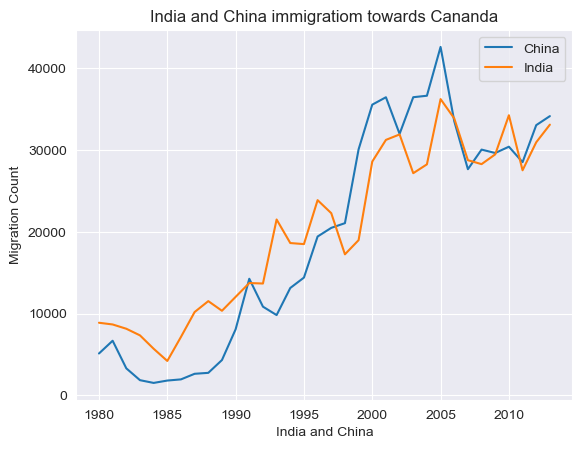

In [214]:
China = All_numeric.loc["China"]
India = All_numeric.loc["India"]

China.plot(kind = "line", xlabel = "China")
India.plot(kind = "line", xlabel = "India")
plt.title("India and China immigratiom towards Cananda")
plt.xlabel("India and China")
plt.ylabel("Migration Count")
plt.legend()
plt.show()

In [215]:
#Finding top 5 countries with total migration records to Canada within the given timeframe 
Immi_Canada["Total"].sort_values(ascending = False).head()

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
Name: Total, dtype: int64

In [219]:
#Setting shorter name for United Kingdom
All_numeric.reset_index(inplace = True)
All_numeric["Country"] = All_numeric["Country"].replace({"United Kingdom of Great Britain and Northern Ireland" : "UK"}) 

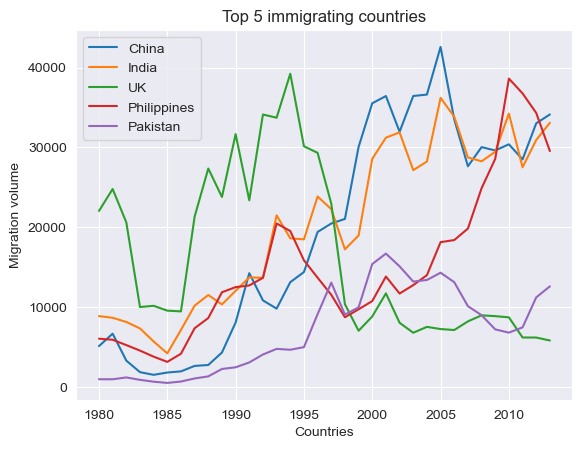

In [220]:
#Ok now returning the index
All_numeric.set_index("Country", inplace = True)
UK = All_numeric.loc["UK"]
Philippines = All_numeric.loc["Philippines"]
Pakistan = All_numeric.loc["Pakistan"]

import matplotlib.pyplot as plt
China.plot(kind = "line", xlabel = "China")
India.plot(kind = "line", xlabel = "India")
UK.plot(kind = "line", xlabel = "UK")
Philippines.plot(kind = "line", xlabel = "Philippines")
Pakistan.plot(kind = "line", xlabel = "Pakistan")
plt.legend()

plt.title("Top 5 immigrating countries")
plt.xlabel("Countries")
plt.ylabel("Migration volume")
plt.show()

In [221]:
#Creating a list of top 5 countries only
Immi_Canada_numeric = Immi_Canada.select_dtypes(include = ["float64", "int64"]) 
Immi_Canada_numeric.sort_values(ascending = False, by = "Total", inplace = True)
Immi_Canada_sorted = Immi_Canada_numeric.head()
Immi_Canada_sorted = Immi_Canada_sorted.T
Immi_Canada_sorted.rename(columns = {"United Kingdom of Great Britain and Northern Ireland" : "United Kingdom"}, inplace = True)
Immi_Canada_sorted.drop("Total", axis = 0, inplace = True)
Immi_Canada_sorted

Country,India,China,United Kingdom,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668
1985,4211,1816,9564,3150,514
1986,7150,1960,9470,4166,691
1987,10189,2643,21337,7360,1072
1988,11522,2758,27359,8639,1334
1989,10343,4323,23795,11865,2261


In [222]:
#Lets attempt to plot directly on axes. For this illustration, we shall plot the total immigration count of top 5 countries throughout the year
File = pd.read_csv("Immigration.csv") 
Immigration = pd.DataFrame(File)
Immigration.head()

,Years,India,China,United Kingdom,Philippines,Pakistan,Total
0,1980,8880,5123,22045,6051,978,43077
1,1981,8670,6682,24796,5921,972,47041
2,1982,8147,3308,20620,5249,1201,38525
3,1983,7338,1863,10015,4562,900,24678
4,1984,5704,1527,10170,3801,668,21870


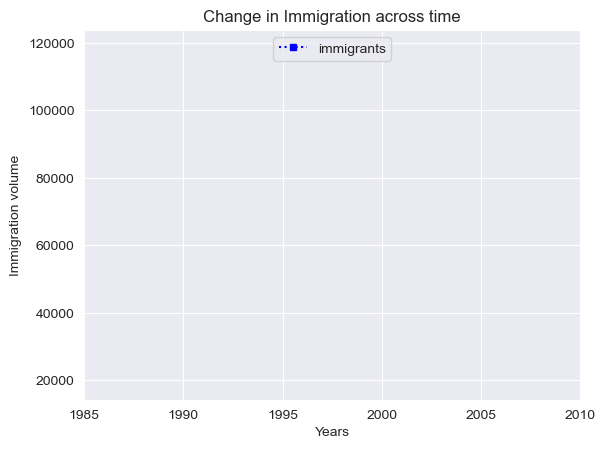

In [223]:
#Immigration.set_index("Years", inplace = True) 
fig, ax = plt.subplots()
ax.plot(Immigration["Total"], 
        marker = "s", #Includes markers in square shapes
        markersize = 5, #Determines the size of the markers
        color = "blue", #Determines the color of the marker
        linestyle = "dotted", #Determines the type ofthe line
        label = "immigrants") #naming the line                     
        
ax.set_title("Change in Immigration across time")
ax.set_xlabel("Years")
ax.set_ylabel("Immigration volume")

plt.xlim(1985, 2010)
plt.grid(True) #enabling the grid
plt.legend(loc = "upper center") #determining the location in where the plot will be placed
plt.show() #It plots the total against time because the time factor is in the x-axis

#### Area plot
The area plot is useful for depicting cummulative contribution of multiple variables across the timeline in a single chart

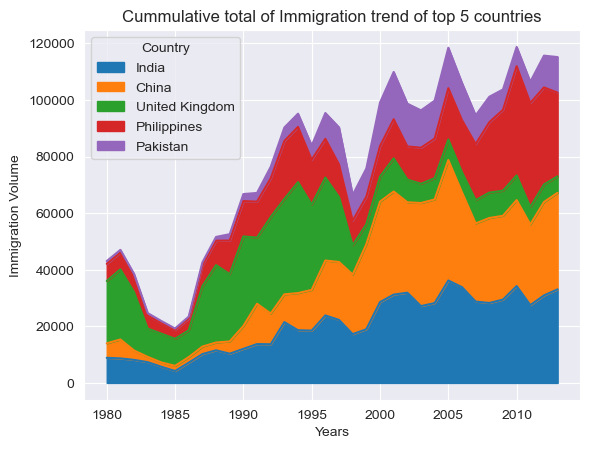

In [225]:
#Now plotting the values in an area plot
import matplotlib as mpl
import matplotlib.pyplot as plt

Immi_Canada_sorted.plot(kind = "area")
plt.title("Cummulative total of Immigration trend of top 5 countries")
plt.xlabel("Years")
plt.ylabel("Immigration Volume")
plt.show()

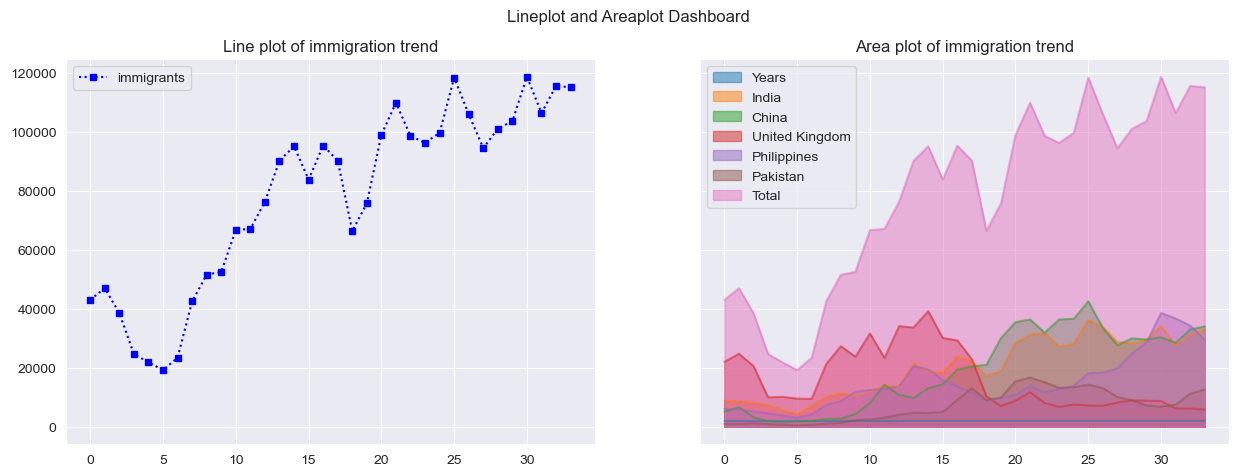

In [226]:
#Using artist script to subplot the area plot with earlier line plot
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (15,5)) #1 and 2 denotes that our canvas will have one row and two columns, and sharey denotes that the y-axis will be
                                                              #shared between the subplots

ax[0].plot(Immigration["Total"], 
        marker = "s", #Includes markers in square shapes
        markersize = 5, #Determines the size of the markers
        color = "blue", #Determines the color of the marker
        linestyle = "dotted", #Determines the type ofthe line
        label = "immigrants") #naming the line   
ax[0].set_title("Line plot of immigration trend")
ax[0].legend()
        
Immigration.plot(kind = "area",
                 stacked = False,
                 alpha = 0.5,
                 ax=ax[1])
ax[1].set_title("Area plot of immigration trend")
ax[1].legend()

fig.suptitle("Lineplot and Areaplot Dashboard")
plt.show()

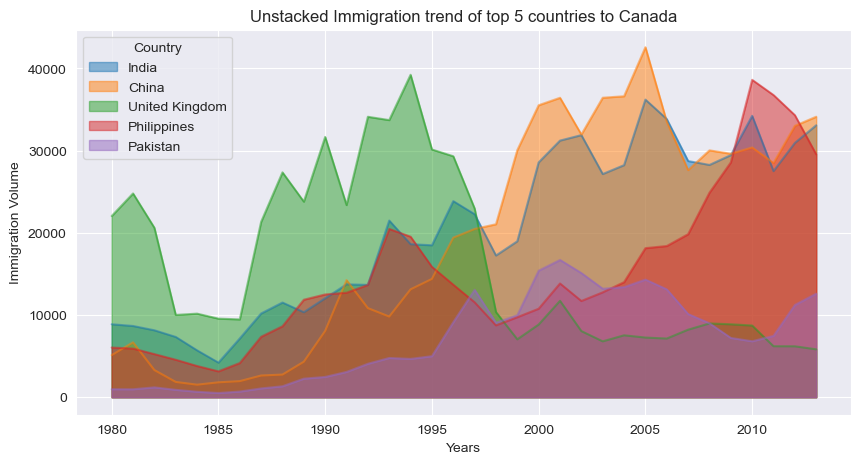

In [227]:
#Creating an unstacked version of the area plot
import matplotlib as mpl
import matplotlib.pyplot as plt

Immi_Canada_sorted.plot(kind = "area", alpha = 0.5, stacked = False, figsize = (10, 5)) #alpha dictates the transparency of the figure
plt.title("Unstacked Immigration trend of top 5 countries to Canada")
plt.xlabel("Years")
plt.ylabel("Immigration Volume")
plt.show()

Text(0, 0.5, 'Migration volumne')

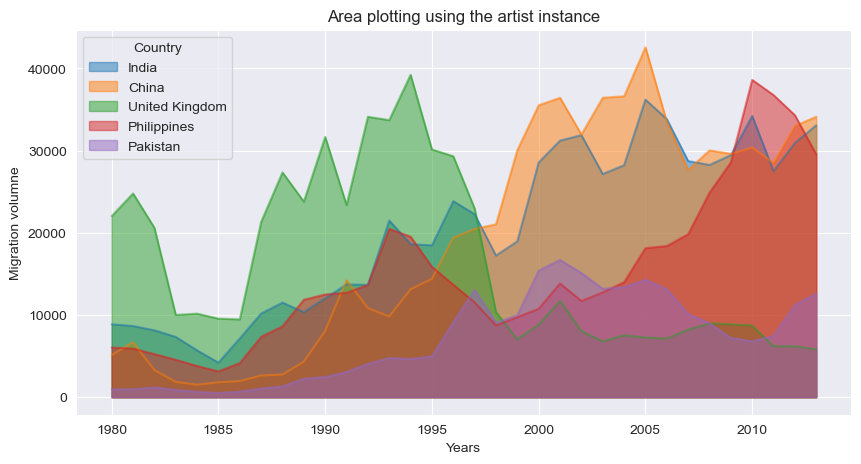

In [228]:
#Except for using the scripting layer for plotting with matplotlib, we might as well use the artist instance of your current plot and store it in a variable (e.g., ax). 
#We can also add more elements by calling methods with a little change in syntax, and working with advanced figures and gridded figures. 
#Such as for the same area plot
ax = Immi_Canada_sorted.plot(kind = "area", alpha = 0.5, stacked = False, figsize = (10, 5))
ax.set_title("Area plotting using the artist instance")
ax.set_xlabel("Years")
ax.set_ylabel("Migration volumne")

#### Histogram
A histogram is a way of representing the frequency distribution of numeric dataset. The way it works is it partitions the x-axis into bins, assigns each data point in our dataset to a bin, and then counts the number of data points that have been assigned to each bin. So the y-axis is the frequency or the number of data points in each bin. Note that we can change the bin size and usually one needs to tweak it so that the distribution is displayed nicely.

In [230]:
Immi_Canada_numeric.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


In [231]:
#Creating histogram for the frequency of different number values of immigration activity of countries within the binned values
#But, at first we need to create appropriate bins for the histogram visualization
import numpy as np

count, bin_values = np.histogram(Immi_Canada_numeric["2013"])
print(count) #prints the occurrence of migration numbers of countries across different bin values
print(bin_values) #prints the bin sizes. Usually ten bin continuums are generated through this numpy binning function

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


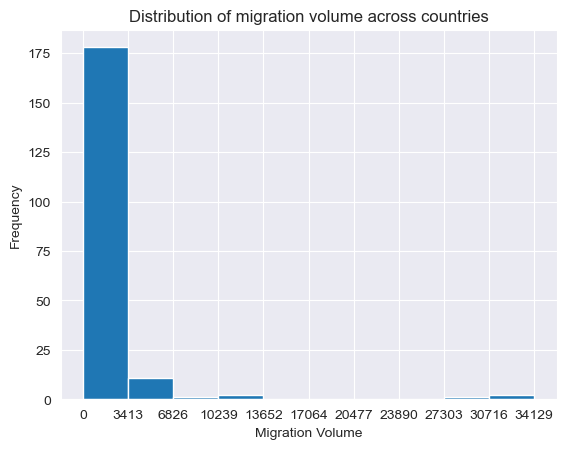

In [232]:
import matplotlib as mpl
import matplotlib.pyplot as plt

Immi_Canada_numeric["2013"].plot(kind = "hist", xticks = bin_values)
plt.title("Distribution of migration volume across countries")
plt.xlabel("Migration Volume")
plt.ylabel("Frequency")
plt.show()
#the histogram is bit skewed but it was expected given that 178 counts of migration values out of 196 were within the first bin 

In [233]:
Immi_Canada_sorted.head()

Country,India,China,United Kingdom,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


<Axes: ylabel='Frequency'>

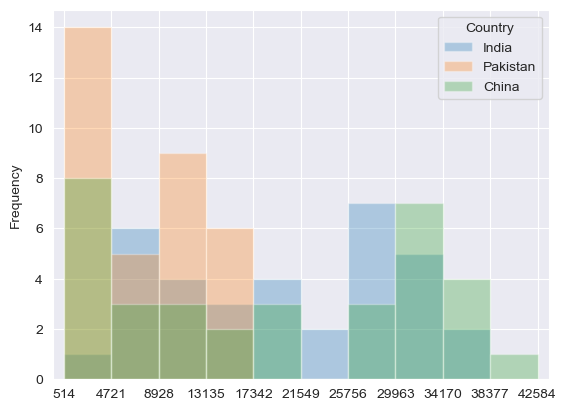

In [234]:
#Creating a histogram with multiple data distributions for India, China, Pakistan
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

Immi_Canada_South_Asia = Immi_Canada_sorted[["India", "Pakistan", "China"]]
count, bin_values = np.histogram(Immi_Canada_South_Asia)
xmin = bin_values[0]-1000 #Adding 10 ticks of free space to the leftmost of the xticks
xmax = bin_values[-1]+1000 #Adding 10 ticks of free space to the rightmost of the xticks

Immi_Canada_South_Asia.plot(kind = "hist", alpha = 0.3, xticks = bin_values, xlim = (xmin, xmax)) 

In [235]:
#Lets plot a histogram through article scripting
Immigration.head()

,Years,India,China,United Kingdom,Philippines,Pakistan,Total
0,1980,8880,5123,22045,6051,978,43077
1,1981,8670,6682,24796,5921,972,47041
2,1982,8147,3308,20620,5249,1201,38525
3,1983,7338,1863,10015,4562,900,24678
4,1984,5704,1527,10170,3801,668,21870


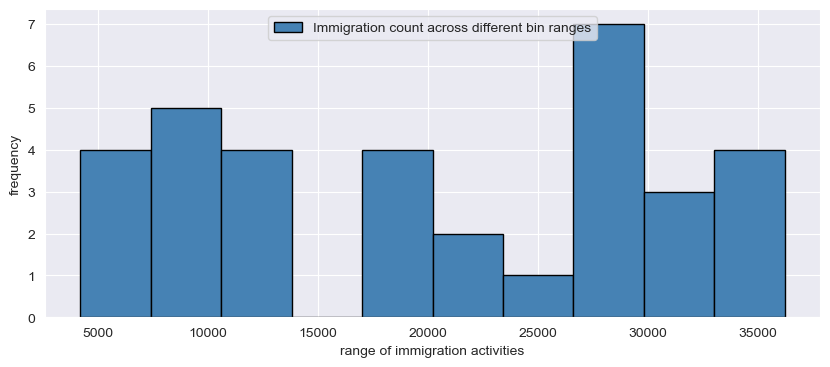

In [236]:
fig, ax = plt.subplots(figsize = (10, 4))
ax.hist(Immigration["India"], 
        edgecolor = "black", 
        color = "steelblue",
        label = "Immigration count across different bin ranges"
       ) 
ax.set_xlabel("range of immigration activities")
ax.set_ylabel("frequency")
ax.grid(True)
ax.legend(loc = "upper center")
plt.show()

#### Bar plots
Bar plots are useful for plotting categorical data

In [238]:
Immi_Canada_numeric_copy = Immi_Canada_numeric.reset_index()
Nepal = Immi_Canada_numeric_copy[Immi_Canada_numeric_copy["Country"] == "Nepal"]
Nepal.drop(columns = "Total", axis = 1, inplace = True)
Nepal.set_index("Country", inplace = True)
Nepal = Nepal.T
Nepal.head()

C:\Users\prien\AppData\Local\Temp\ipykernel_17828\1726246747.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country,Nepal
1980,1
1981,1
1982,6
1983,1
1984,2


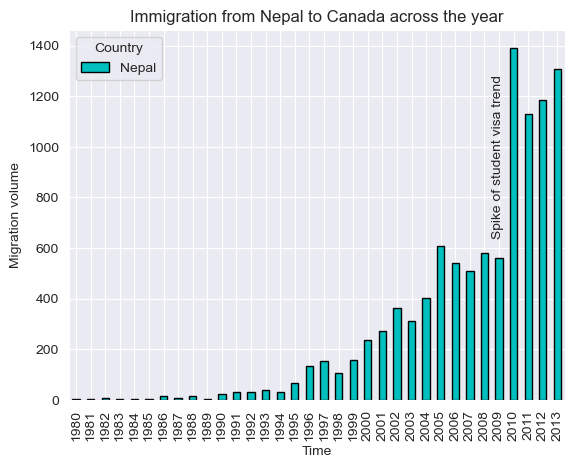

In [240]:
#Now bar plotting with text annotation
import matplotlib as mpl
import matplotlib.pyplot as plt

Nepal.plot(kind = "bar", color = "c", edgecolor = "black") #edgecolor is nothing but coloring the borders of the bars
plt.title("Immigration from Nepal to Canada across the year")
plt.xlabel("Time")
plt.ylabel("Migration volume")

plt.annotate("Spike of student visa trend", xy = (28.5, 650), rotation = 90) #Annotation seems to be a pretty trial adn error place with possibilities only when ggplot style
                                                                             #grid is used for grid reference
plt.show()

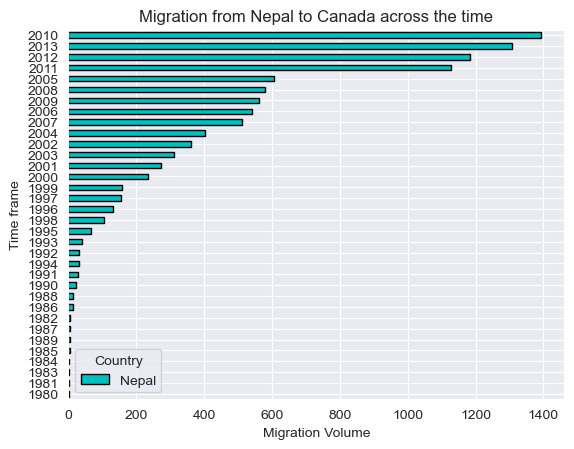

In [241]:
#creating a horizontal bar graph instead. Horizontal bar graphs are used for comparisons when the values are sorted
Nepal.sort_values(ascending = True, by = "Nepal", inplace = True)
import matplotlib as mpl
import matplotlib.pyplot as plt

Nepal.plot(kind = "barh", color = "c", edgecolor = "black")
plt.title("Migration from Nepal to Canada across the time")
plt.xlabel("Migration Volume")
plt.ylabel("Time frame")
plt.show()

In [242]:
Immigration.reset_index(inplace = True)

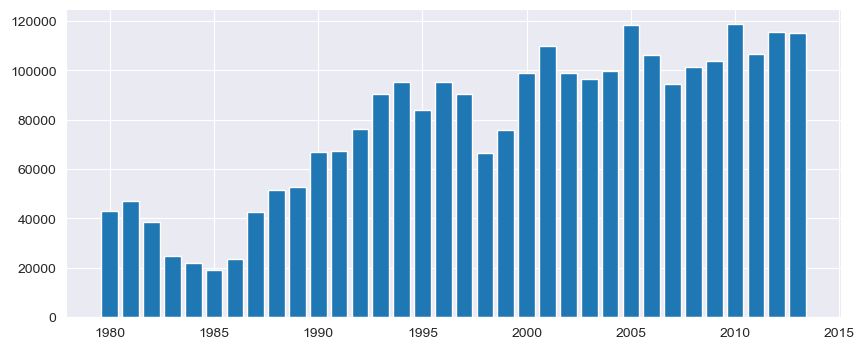

In [247]:
#Using the article script to construct bar graph
fig, ax = plt.subplots(figsize = (10, 4))

ax.bar(Immigration["Years"], Immigration["Total"])
plt.show()

#### Pie Charts
A pie chart is a circular graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices. Pie Charts are useful for depicting the contribution of multiple variables to a certain aggregate for a specific point in time

In [251]:
Immi_Canada.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [254]:
#Lets visualize the contribution of different continents to the total immigration volume in Canada. But first, it is necessary for us to group the coountries into continents
Immi_Canada_grpd = Immi_Canada.groupby("Continent")["Total"].sum()
Immi_Canada_grpd

Continent
Africa                              618948
Asia                               3317794
Europe                             1410947
Latin America and the Caribbean     765148
Northern America                    241142
Oceania                              55174
Name: Total, dtype: int64

In [256]:
Immi_Canada_grpd.index

Index(['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean',
       'Northern America', 'Oceania'],
      dtype='object', name='Continent')

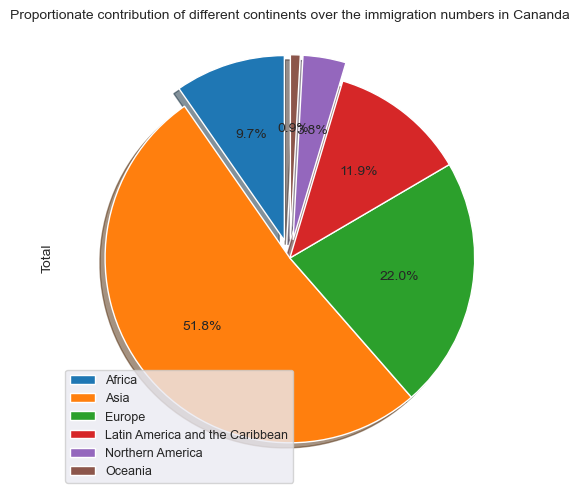

In [257]:
import matplotlib as mlp
import matplotlib.pyplot as plt

explode_list = [0.1, 0, 0, 0, 0.1, 0.1] #This (distance from the center) can create an exploding effect to specific slices of the pie chart 

Immi_Canada_grpd.plot(kind = "pie", figsize = (10, 6), autopct='%1.1f%%', startangle = 90, shadow = True, labels = None, explode = explode_list) #shadow can create 3D effect
                                                                                                                                                #autopct adds percentages in
                                                                                                                                                #the slices
plt.title("Proportionate contribution of different continents over the immigration numbers in Cananda", fontsize =10)
plt.legend(labels = Immi_Canada_grpd.index, fontsize = 9)
#Turns out pie chart needs lots of tinkering with font sizes

In [258]:
#Constructing the pie chart through the artist script
#Immigration.set_index("Years", inplace = True)
Immigration.head()

,index,Years,India,China,United Kingdom,Philippines,Pakistan,Total
0,0,1980,8880,5123,22045,6051,978,43077
1,1,1981,8670,6682,24796,5921,972,47041
2,2,1982,8147,3308,20620,5249,1201,38525
3,3,1983,7338,1863,10015,4562,900,24678
4,4,1984,5704,1527,10170,3801,668,21870


Text(0.5, 1.0, 'Immigration composition for 1981')

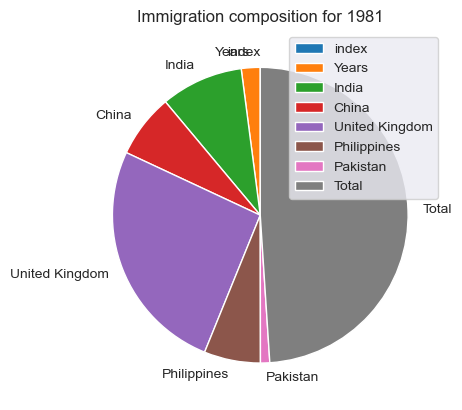

In [259]:
fig, ax = plt.subplots()

ax.pie(Immigration.iloc[1], 
       labels = Immigration.columns,
       startangle = 90, 
      )
ax.legend()
ax.set_title("Immigration composition for 1981")

#### Boxplots

In [261]:
Immi_Canada_sorted.head()

Country,India,China,United Kingdom,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


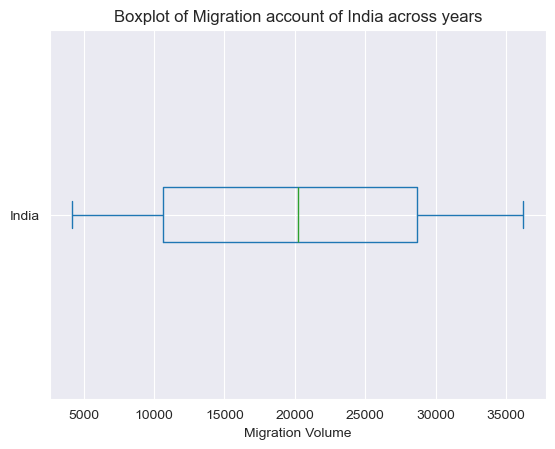

In [262]:
#Lets boxplot the immigration pattern of India towards Canada. Although, such visualizations are not recommended for timeseries data
import matplotlib as mpl
import matplotlib.pyplot as plt

Immi_Canada_sorted["India"].plot(kind = "box", vert = False) #vert parameter helps decide whether we want a sleeping or standing boxplot
plt.title("Boxplot of Migration account of India across years")
plt.xlabel("Migration Volume")
plt.show()

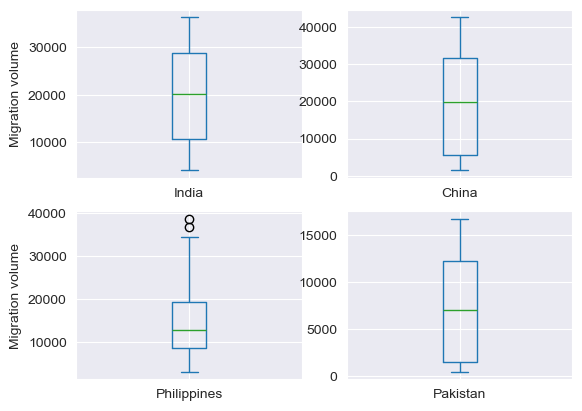

In [264]:
#subplotting or multiplotting the boxplots of India, China, and Pakistan 
#With subplots, we usually work with the artist layer instead of the scripting layer
fig = plt.figure() #So first, we create a blank canvas
ax0 = fig.add_subplot(2, 2, 1) #so this mean we will have a figure grid or the canvas with two rows and two columns (2X2), and this is the first subplot
ax1 = fig.add_subplot(2, 2, 2) #this is the second subplot in the same grid size (2X2) and so on
ax2 = fig.add_subplot(2, 2, 3) 
ax3 = fig.add_subplot(2, 2, 4) 

Immi_Canada_sorted["India"].plot(kind = "box", ax=ax0)
Immi_Canada_sorted["China"].plot(kind = "box", ax=ax1)
Immi_Canada_sorted["Philippines"].plot(kind = "box", ax=ax2)
Immi_Canada_sorted["Pakistan"].plot(kind = "box", ax=ax3)

ax0.set_ylabel("Migration volume")
ax2.set_ylabel("Migration volume")

plt.show()


#### Scatterplot
A scatter plot (2D) is a useful method of comparing variables against each other. Scatter plots look similar to line plots in that they both map independent and dependent variables on a 2D graph. While the data points are connected together by a line in a line plot, they are not connected in a scatter plot. The data in a scatter plot is considered to express a trend. With further analysis using tools like regression, we can mathematically calculate this relationship and use it to predict trends outside the dataset.

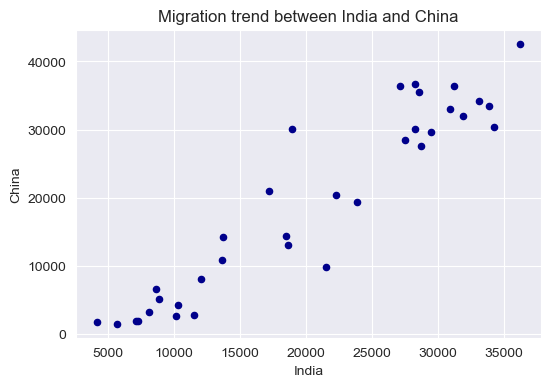

In [266]:
#Lets scatter the migration trend between India and China across our given timeframe
import matplotlib as mpl
import matplotlib.pyplot as plt

Immi_Canada_sorted.plot(x = "India", y = "China", kind = "scatter", color = "darkblue", figsize = (6, 4))
plt.title("Migration trend between India and China")
plt.show()

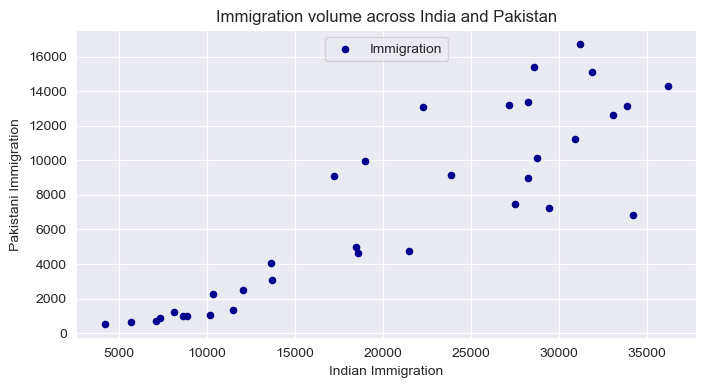

In [267]:
#Plotting with the article script
fig, ax = plt.subplots(figsize = (8, 4))

ax.scatter(Immigration["India"], Immigration["Pakistan"], 
           marker = "o",
           s = 20, #determining the size of the markers
           color = "darkblue", 
           label = "Immigration"
          )

ax.set_title("Immigration volume across India and Pakistan")
ax.set_xlabel("Indian Immigration")
ax.set_ylabel("Pakistani Immigration")
ax.legend(loc = "upper center")
ax.grid(True)

plt.show()

#### Bubble Plot
A bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). The data points are replaced with bubbles, and the size of the bubble is determined by the third variable z, also known as the weight. 

In [269]:
#Lets watch the trend of total migration of all countries across the year in a scatter, and use the bubble (i.e., the third dimension) to observe the migration trend of China
Immi_Canada_numeric_T = Immi_Canada_numeric.T
Immi_Canada_numeric_T["Total"] = Immi_Canada_numeric_T.sum(axis = 1) 
Immi_Canada_numeric_T.reset_index(inplace = True)
Immi_Canada_numeric_T.head()

Country,index,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,New Caledonia,San Marino,Marshall Islands,Western Sahara,Palau,Total
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,99137
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,1,1,0,0,0,0,0,110563
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,104271
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,0,0,0,0,0,0,0,0,0,75550
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,1,0,0,0,0,0,0,73417


In [270]:
import numpy as np
Immi_Canada_numeric_T["index"] = Immi_Canada_numeric_T["index"].replace("Total", np.nan).dropna().astype(int)
Immi_Canada_numeric_T.head()

Country,index,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,New Caledonia,San Marino,Marshall Islands,Western Sahara,Palau,Total
0,1980.0,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,99137
1,1981.0,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,1,1,0,0,0,0,0,110563
2,1982.0,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,104271
3,1983.0,7338,1863,10015,4562,900,7100,1592,197,1081,...,0,0,0,0,0,0,0,0,0,75550
4,1984.0,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,1,0,0,0,0,0,0,73417


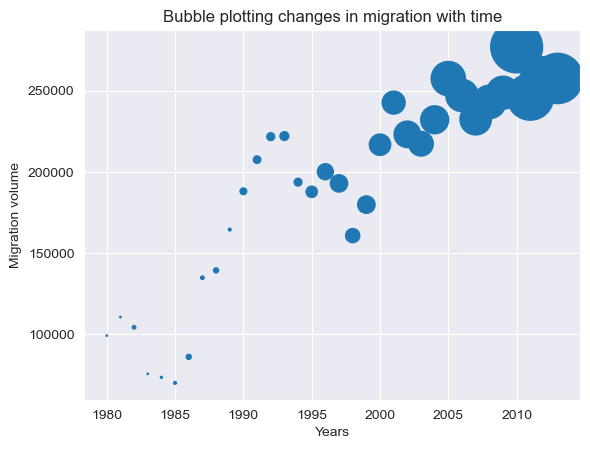

In [271]:
#Now lets proceed with the bubbleplot
import matplotlib as mpl
import matplotlib.pyplot as plt

Immi_Canada_numeric_T.plot(x = "index", y = "Total", s = "Nepal", kind = "scatter") 
plt.title("Bubble plotting changes in migration with time")
plt.xlabel("Years")
plt.ylabel("Migration volume")
plt.show()

#### Treemaps
Treemaps are a form of data visualization that displays hierarchical data using nested rectangles. Each branch of the hierarchy is given a rectangle, which is then tiled with smaller rectangles representing sub-branches. Treemaps are particularly useful for visualizing large datasets where the hierarchical structure is crucial, offering an intuitive and space-efficient way to display data.

In [273]:
#We shall be working with hierarchical export categorization data of Nigeria for the construction of Tree maps
File = pd.read_csv("Nigeria_Export.csv")
Nigeria_export = pd.DataFrame(File)
Nigeria_export.head()

,HS2,HS2 ID,HS4,HS4 ID,HS6,HS6 ID,Section,Section ID,Trade Value,Year
0,Live animals,101,Horses,10101,Pure-bred Breeding Horses,1010111,Animal Products,1,114.0,2023
1,Live animals,101,Bovine,10102,Pure-bred Breeding Cattle,1010210,Animal Products,1,3915.0,2023
2,Live animals,101,Bovine,10102,Non-breeding Cattle,1010290,Animal Products,1,102969.0,2023
3,Live animals,101,Pigs,10103,Pure-bred Breeding Pigs,1010310,Animal Products,1,7352.0,2023
4,Live animals,101,Pigs,10103,Pigs Weighing Under 50 kg (Excluding Breeding ...,1010391,Animal Products,1,10995.0,2023


In [274]:
Nigeria_export["HS2"].unique()

array(['Live animals', 'Meat & edible offal',
       'Fish, Crustaceans & Molluscs',
       'Edible products of animal origin, n.e.s.',
       'Animal originated products, n.e.s.',
       'Live trees, plants, bulbs, cut flowers, & ornamental foliage',
       'Edible vegetables, roots, & tubers',
       'Edible fruits, nuts & fruit peels', 'Coffee, tea, mate & spices',
       'Cereals', 'Products of the milling industry',
       'Oils seeds, oleaginous fruits, grains, straw & fodder',
       'Natural gums, resins & other vegetable extracts',
       'Vegetable plaiting materials & products, n.e.s.',
       'Animal or vegetable fats, oils, & waxes',
       'Preparations of fish, crustacenas, & molluscs',
       'Sugars & confectioneries', 'Cocoa & cocoa preparations',
       'Preparations of cereals, flour, starch or milk',
       'Preparations of vegetables, fruit, nuts or other plant parts',
       'Miscellaneous edible preparations',
       'Beverages, spirits, & vinegar',
       'Food

In [275]:
#For our simplicity we shall be working only with few of the HS2 categories
Nigeria_export_tree = Nigeria_export[(Nigeria_export["HS2"] == "Live animals") | (Nigeria_export["HS2"] == "Meat & edible offal") | 
(Nigeria_export["HS2"] == "Edible products of animal origin, n.e.s.") | (Nigeria_export["HS2"] == "Edible vegetables, roots, & tubers") | (Nigeria_export["HS2"] == "Cereals")]   

Nigeria_export_tree["HS2"].unique()

array(['Live animals', 'Meat & edible offal',
       'Edible products of animal origin, n.e.s.',
       'Edible vegetables, roots, & tubers', 'Cereals'], dtype=object)

In [276]:
Nigeria_export_tree.head()

,HS2,HS2 ID,HS4,HS4 ID,HS6,HS6 ID,Section,Section ID,Trade Value,Year
0,Live animals,101,Horses,10101,Pure-bred Breeding Horses,1010111,Animal Products,1,114.0,2023
1,Live animals,101,Bovine,10102,Pure-bred Breeding Cattle,1010210,Animal Products,1,3915.0,2023
2,Live animals,101,Bovine,10102,Non-breeding Cattle,1010290,Animal Products,1,102969.0,2023
3,Live animals,101,Pigs,10103,Pure-bred Breeding Pigs,1010310,Animal Products,1,7352.0,2023
4,Live animals,101,Pigs,10103,Pigs Weighing Under 50 kg (Excluding Breeding ...,1010391,Animal Products,1,10995.0,2023


In [277]:
#It appears we only want the actual names within the category but not the code or ID
Nigeria_export_tree = Nigeria_export_tree[["HS2", "HS4", "HS6", "Trade Value"]]
Nigeria_export_tree.head()

,HS2,HS4,HS6,Trade Value
0,Live animals,Horses,Pure-bred Breeding Horses,114.0
1,Live animals,Bovine,Pure-bred Breeding Cattle,3915.0
2,Live animals,Bovine,Non-breeding Cattle,102969.0
3,Live animals,Pigs,Pure-bred Breeding Pigs,7352.0
4,Live animals,Pigs,Pigs Weighing Under 50 kg (Excluding Breeding ...,10995.0


In [279]:
#Ploty is required to construct tree maps. Plotly is useful for building interactive visuals that can serve as dashboards
import plotly.express as px
fig = px.treemap(Nigeria_export_tree, path = ["HS2", "HS4", "HS6"], values = "Trade Value", title = "Nigeria Export Hierarchy") #Note that we are using plotly for our purpose
fig.show()

#### Pivot Charts and Tables
Pivot charts are a powerful tool used for data visualization and analysis. They allow users to dynamically summarize and explore large datasets, revealing insights and trends that might not be immediately obvious. Pivot charts are widely used in business intelligence, finance, marketing, and various other fields where data analysis is crucial.

In [281]:
# Let's begin by developing a pivot table
import numpy as np
Export_pivot = Nigeria_export_tree.pivot_table(index = "HS2", columns = ["HS4", "HS6"], values = "Trade Value", aggfunc = np.mean, fill_value = 0) 
Export_pivot_short = Export_pivot.iloc[:, 0:15]
Export_pivot_short
#It appears we have a lot of null values because some categories are irrelevant to specific sub-categories

C:\Users\prien\AppData\Local\Temp\ipykernel_17828\2282045012.py:3: FutureWarning:

The provided callable <function mean at 0x000001C3E5A3BE20> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



HS4                                      Barley              Bovine  \
HS6                                      Barley Non-breeding Cattle   
HS2                                                                   
Cereals                                   494.0                 0.0   
Edible products of animal origin, n.e.s.    0.0                 0.0   
Edible vegetables, roots, & tubers          0.0                 0.0   
Live animals                                0.0            102969.0   
Meat & edible offal                         0.0                 0.0   

HS4                                                                Buckwheat  \
HS6                                      Pure-bred Breeding Cattle Buckwheat   
HS2                                                                            
Cereals                                                        0.0      12.0   
Edible products of animal origin, n.e.s.                       0.0       0.0   
Edible vegetables, roots, & tubers                             0.0       0.0   
Live animals                                                3915.0       0.0   
Meat & edible offal                                            0.0       0.0   

HS4                                                                        \
HS6                                      Canary seed Cereals unmilled nes   
HS2                                                                         
Cereals                                         11.0              21050.0   
Edible products of animal origin, n.e.s.         0.0                  0.0   
Edible vegetables, roots, & tubers               0.0                  0.0   
Live animals                                     0.0                  0.0   
Meat & edible offal                              0.0                  0.0   

HS4                                                                    Butter  \
HS6                                         Millet Butter and Other Milk Fats   
HS2                                                                             
Cereals                                   387426.0                        0.0   
Edible products of animal origin, n.e.s.       0.0                    42402.0   
Edible vegetables, roots, & tubers             0.0                        0.0   
Live animals                                   0.0                        0.0   
Meat & edible offal                            0.0                        0.0   

HS4                                                              Cabbages  \
HS6                                      Brussels Sprouts (Fresh/Chilled)   
HS2                                                                         
Cereals                                                               0.0   
Edible products of animal origin, n.e.s.                              0.0   
Edible vegetables, roots, & tubers                                  618.0   
Live animals                                                          0.0   
Meat & edible offal                                                   0.0   

HS4                                                                               \
HS6                                      Cauliflowers & Broccoli (Fresh/Chilled)   
HS2                                                                                
Cereals                                                                      0.0   
Edible products of animal origin, n.e.s.                                     0.0   
Edible vegetables, roots, & tubers                                        1416.0   
Live animals                                                                 0.0   
Meat & edible offal                                                          0.0   

HS4                                                                        \
HS6                                      Edible Brassicas (Fresh/Chilled)   
HS2                                                                         
Cer

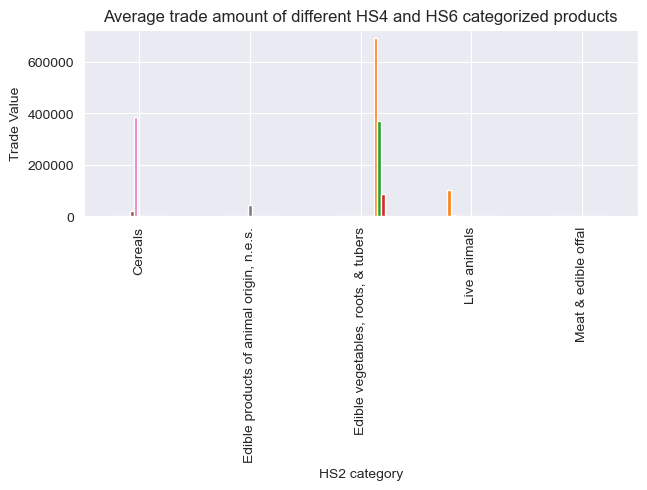

In [284]:
Export_pivot_short.plot(kind = "bar", legend = False)
plt.tight_layout()
plt.title("Average trade amount of different HS4 and HS6 categorized products")
plt.xlabel("HS2 category")
plt.ylabel("Trade Value")
plt.show()
#The signficant number of zeroes are taking up space in the bar chart

#### Waffle Charts
A waffle chart is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard. Waffle Charts, alike to pie charts, are mostly used to show proportions.  

In [290]:
Immigration.head()

,index,Years,India,China,United Kingdom,Philippines,Pakistan,Total
0,0,1980,8880,5123,22045,6051,978,43077
1,1,1981,8670,6682,24796,5921,972,47041
2,2,1982,8147,3308,20620,5249,1201,38525
3,3,1983,7338,1863,10015,4562,900,24678
4,4,1984,5704,1527,10170,3801,668,21870


In [291]:
# Let's try to create a waffle chart only for the contribution of different countries towards migration in Year 1980
Immigration_1980 = Immigration.iloc[0]
Immigration_1980.drop("Total", inplace = True)
Immigration_1980 #It is important to note that waffle works best with Series and not dataframe

C:\Users\prien\AppData\Local\Temp\ipykernel_17828\2084524558.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



index                 0
Years              1980
India              8880
China              5123
United Kingdom    22045
Philippines        6051
Pakistan            978
Name: 0, dtype: int64

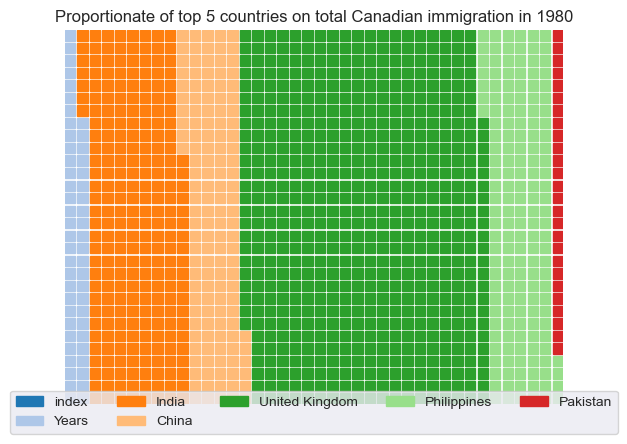

In [292]:
from pywaffle import Waffle
fig = plt.figure(FigureClass = Waffle, 
                 rows = 30, columns = 40, #In our waffle, which is usually rectangle in shape if you have eaten one, will have 30 rows and 40 columns
                 values = Immigration_1980, 
                 cmap_name = "tab20", #some random color scheme
                 legend = {"labels": Immigration_1980.index.to_list(), #index has to be on list format
                           "loc": "lower center", 
                           "bbox_to_anchor" : (0.5, -0.1), #this helps in positioning the distance of our legend from the waffle
                           "ncol": 5} #the default is setting is in one coloumn, this will help positioning the labels on single row but multiple columns
                )
plt.title("Proportionate of top 5 countries on total Canadian immigration in 1980") 
plt.show()  

#### Word Clouds
Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

In [294]:
from wordcloud import WordCloud, STOPWORDS
with open("wordcloud.txt", "r", encoding = "utf-8") as File: #for some reason we needed to deploy "utf-8" method to be able to read it with "with" function
    PSP = File.read() #Only reading 2000 letters for now
    print(PSP)

Refining the provisions of private sector participation in the Transmission and Distribution domains of the energy value chain in Nepal
In a recent rendezvous between The DMN news and the President of the Independent Power Producers’ Association of Nepal, it was revealed that the developments in the transmission aspect of the energy value chain in Nepal have remained sluggish in comparison to the generation counterpart. Meanwhile, without parallel advancements in the transmission aspect of the energy value chain, the ambitious goal set by the energy community of Nepal to produce 28,000 megawatts (MW) of electricity by 2035 and ensure cross-border export of 10,000 MW are either going to be insufficiently leveraged or partially met if the stock of transmission infrastrature to optimally evacute the anticipated generation capacity until the demand centers is not expedited accordingly. Amid such consideration, the Nepal Government pledges to develop 7000 km (approx.) of transmission gridli

In [295]:
#So, now proceeding with wordcloud construction
wc = WordCloud()
wc.generate(PSP) #This function is more like fitting the model that happens in the backend. Now the figure is fitted on wx

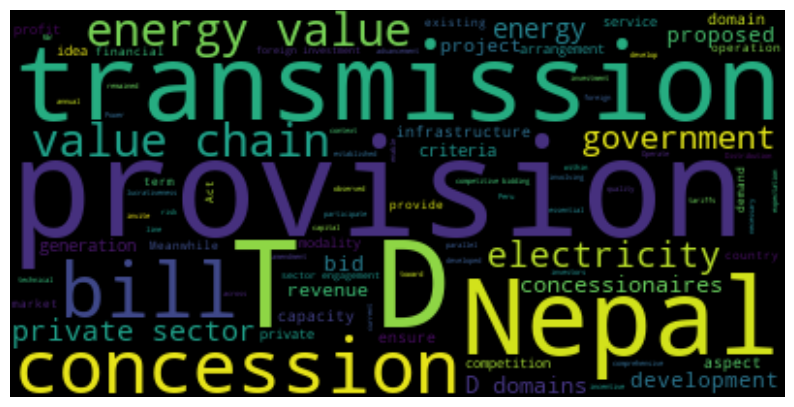

In [296]:
fig = plt.figure(figsize = (10, 10))
plt.imshow(wc, interpolation = "bilinear") #imshow is a common matplotlib function that shows the result in the axes format. Meanwhile, bilinear method is used to calculate
                                               # new pixel values when pixels don't perfectly align with screen pixels. 
                                               # Bilinear is a common and relatively smooth interpolation method. It takes a weighted average of the 2x2 neighborhood of 
                                               #pixels surrounding each point to determine the new pixel value
plt.axis("off")
plt.show()

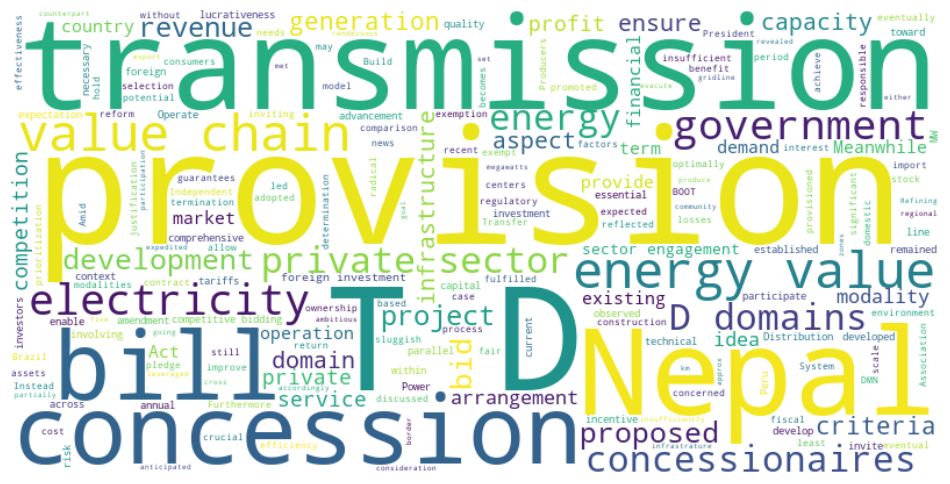

In [299]:
#We might also get rid of the word "provision", as it is not a noun. We can add the word provision in the stopwords function for this purpose
from wordcloud import WordCloud, STOPWORDS
st = set(STOPWORDS) #stopwrods fitting much like model fitting
st.add("provision")

wc = WordCloud(width = 800, height = 400, background_color = "white", random_state = 0)
wc.generate(PSP)

fig = plt.figure(figsize = (12, 12))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.show()
#this definitely looks richer and neater. But the word provision did not disappear

### Plotting with Seaborn

#### Countplot
A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable

<Figure size 1000x1000 with 0 Axes>

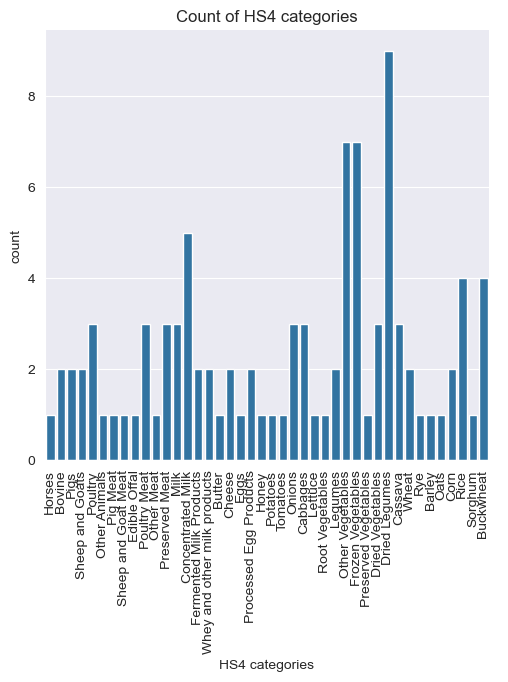

In [304]:
# Let's try to check the frequency of values that fall within the HS4 categories
import seaborn as sns
plt.figure(figsize = (10, 10))
sns.catplot(x = Nigeria_export_tree["HS4"], kind = "count")

plt.title("Count of HS4 categories")
plt.xticks(rotation = 90)
plt.xlabel("HS4 categories")
plt.ylabel("count")
plt.show()

#### Regression Plot
Although we have been highly immersed with regression in our past learnings, lets learn to make it flashy for now

In [306]:
Immigration.head()

,index,Years,India,China,United Kingdom,Philippines,Pakistan,Total
0,0,1980,8880,5123,22045,6051,978,43077
1,1,1981,8670,6682,24796,5921,972,47041
2,2,1982,8147,3308,20620,5249,1201,38525
3,3,1983,7338,1863,10015,4562,900,24678
4,4,1984,5704,1527,10170,3801,668,21870


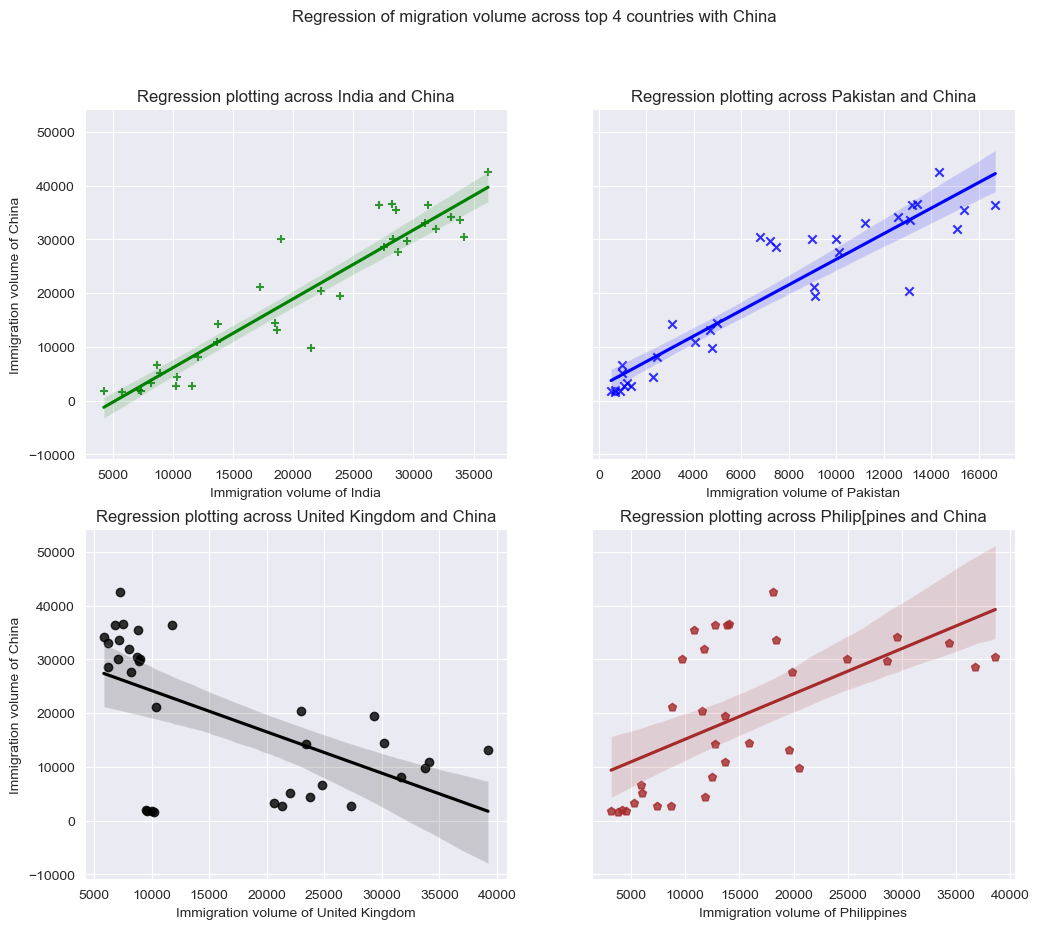

In [308]:
#Lets regress between the migration volume from India and China across our provided years
import seaborn as sns
fig, ax = plt.subplots(2, 2, sharey = True, figsize = (12, 10))

ax[0,0] = sns.regplot(x = Immigration["India"], y = Immigration["China"], color = "green", marker = "+", ax = ax[0,0]) #Lets use the artist scripting method
ax[0,0].set_xlabel("Immigration volume of India")
ax[0,0].set_ylabel("Immigration volume of China")
ax[0,0].set_title("Regression plotting across India and China")

ax[0,1] = sns.regplot(x = Immigration["Pakistan"], y = Immigration["China"], color = "blue", marker = "x", ax = ax[0,1]) 
ax[0,1].set_xlabel("Immigration volume of Pakistan")
ax[0,1].set_ylabel(None)
ax[0,1].set_title("Regression plotting across Pakistan and China")

ax[1,0] = sns.regplot(x = Immigration["United Kingdom"], y = Immigration["China"], color = "black", marker = "o", ax = ax[1,0]) 
ax[1,0].set_xlabel("Immigration volume of United Kingdom")
ax[1,0].set_ylabel("Immigration volume of China")
ax[1,0].set_title("Regression plotting across United Kingdom and China")

ax[1,1] = sns.regplot(x = Immigration["Philippines"], y = Immigration["China"], color = "brown", marker = "p", ax = ax[1,1]) 
ax[1,1].set_xlabel("Immigration volume of Philippines")
ax[1,1].set_ylabel(None)
ax[1,1].set_title("Regression plotting across Philip[pines and China")

fig.suptitle("Regression of migration volume across top 4 countries with China")
sns.set_style("darkgrid")
plt.show()

# Visualizing Geospatial Data

### Working with Folium
Folium is a powerful Python library that helps you create several types of Leaflet maps. The fact that the Folium results are interactive makes this library very useful for dashboard building. Folium builds on the data wrangling strengths of the Python ecosystem and the mapping strengths of the Leaflet.js library. Manipulate your data in Python, then visualize it on a Leaflet map via Folium.

Folium makes it easy to visualize data that's been manipulated in Python on an interactive Leaflet map. It enables both the binding of data to a map for choropleth visualizations and passing Vincent/Vega visualizations as markers on the map. The library has several built-in tilesets from OpenStreetMap, Mapbox, Cartodb and supports custom tilesets with Mapbox or Cloudmade API keys. Folium supports both GeoJSON and TopoJSON overlays, as well as the binding of data to those overlays to create choropleth maps with color-brewer color schemes.

Popular webtile options for Folium include:
* OpenStreetMap (default)
* Stamen (Terrain, Toner, Watercolor), for instance, (tiles = "Stamen Watercolor")
* CartoDB (positron, dark_matter), for instance, (tiles = "CartoDB positron") 

In [311]:
import folium
world_map = folium.Map()
world_map
#It deploys what must be a Open Street Map

In [314]:
#Rendering the world_map by centering it around Canada
world_map = folium.Map(location = [56.130, -106.35], zoom_start = 5) #zoom_start define the level of zoom 
world_map

In [315]:
#Rendering a Cartodb_dark_matter_map type of Nepal centered around Kathmandu
world_map = folium.Map(location = [27.710471975136883, 85.3233506550171], zoom_start = 10, tiles = "CartoDB dark_matter")
world_map

In [316]:
#Rendering on a Cartodb positron map
world_map = folium.Map(location = [27.710471975136883, 85.3233506550171], zoom_start = 10, tiles = "Cartodb positron")
world_map

In [317]:
# Let's work with the San Francisco crime report data to begin with 
File = pd.read_csv("SF_crime_report.csv")
SF_crime = pd.DataFrame(File)
SF_crime.drop(columns = "Unnamed: 0", axis = 1, inplace = True)
SF_crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [318]:
SF_crime.shape
#Just to let know there are about 150 thousand records in our dataset

(150500, 13)

In [320]:
SF_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IncidntNum  150500 non-null  int64  
 1   Category    150500 non-null  object 
 2   Descript    150500 non-null  object 
 3   DayOfWeek   150500 non-null  object 
 4   Date        150500 non-null  object 
 5   Time        150500 non-null  object 
 6   PdDistrict  150499 non-null  object 
 7   Resolution  150500 non-null  object 
 8   Address     150500 non-null  object 
 9   X           150500 non-null  float64
 10  Y           150500 non-null  float64
 11  Location    150500 non-null  object 
 12  PdId        150500 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [321]:
#We shall be working only with the first 100 records to reduce our computational cost
SF_crime = SF_crime.iloc[0:100]
SF_crime.shape

(100, 13)

In [323]:
#So lets initiate folium and begin our map rendering activity
import folium
SF_map = folium.Map(location = [37.77, -122.42], zoom_start = 12)
SF_map
#we get a nice view of San Francisco and the popular SF bridges

In [324]:
#Now lets superimpose the locations of our crime data in the rendered map

In [325]:
incidents = folium.map.FeatureGroup()

for lat, lng in zip(SF_crime["Y"], SF_crime["X"]): #introducing the zip function, for iterating more than one feature at once. Not sure how it is useful other than working with
                                                   #lat, long coordinates. Make sure that Latitude is always "Y" and longitude is "X"
    incidents.add_child(folium.vector_layers.CircleMarker(
        [lat, lng], 
        radius = 3,
        color = "yellow",
        fill = True,
        fill_color = "blue",
        fill_opacity = 0.6))

#adding popup text to each marker in terms of category for each nature of crime that occurred
latitude = list(SF_crime["Y"])
longitude = list(SF_crime["X"])
labels = list(SF_crime["Category"])

for lat, long, label in zip(latitude, longitude, labels):
    folium.Marker([lat, long], popup = label).add_to(SF_map)
              
SF_map.add_child(incidents)

In [328]:
#generating relatively uncongested map markers and pop-ups without a drop pin
import folium
SF_map =folium.Map(location = [37.77, -122.42], zoom_start = 13)
for lat, long, labels in zip(SF_crime["Y"], SF_crime["X"], SF_crime["Category"]):
    folium.vector_layers.CircleMarker(
        [lat, long], 
        radius = 5,
        color = "red",
        fill = True,
        fill_color = "blue",
        fill_opacity = 0.3,
        popup = labels).add_to(SF_map)
SF_map
#this practice looks more neat and clean, and easier to code

In [329]:
#Alike to clustering functions like DBSCAN and HDBSCAN, clustering of coordinates is also possible with folium in a rather interactive fashion
import folium
from folium import plugins

SF_map =folium.Map(location = [37.77, -122.42], zoom_start = 13)
incidents = plugins.MarkerCluster().add_to(SF_map)

for lat, long, labels in zip(SF_crime["Y"], SF_crime["X"], SF_crime["Category"]):
    folium.Marker([lat, long], 
                  icon = None,
                  popup = labels).add_to(incidents)

SF_map.save("SF_crimes.html") #you don't save folium renders into a static file such as figures, but into a dynamic and interactive files such as html
SF_map
#A very pretty and interactive cluster seem to appear that change with zoom level 

### Choropleth 
A Choropleth map is a thematic map in which areas are shaded or patterned in proportion to the measurement of the statistical variable being displayed on the map. he choropleth map provides an easy way to visualize how a measurement varies across a geographic area, or it shows the level of variability within a region.

In [333]:
All_numeric["Total"] = All_numeric.sum(axis = 1)
All_numeric.reset_index(inplace = True)

In [335]:
All_numeric.head()

,Country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,16,39,39,47,71,340,496,741,828,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,1,0,0,0,0,0,1,2,2,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,80,67,71,69,63,44,69,132,242,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,0,0,0,0,0,0,2,0,0,...,0,1,1,0,0,0,0,1,1,15


In [337]:
#We shall use the total immigration from each country to Canada across all given years for our purpose
All_numeric_map = All_numeric[["Country", "Total"]] 
All_numeric_map.head()

,Country,Total
0,Afghanistan,58639
1,Albania,15699
2,Algeria,69439
3,American Samoa,6
4,Andorra,15


In [339]:
#we need a base map of the world, for us to choropleth it with the immigration data. So, lets call in the download geojson file of the world map
with open("world_countries.json", "r") as file: #using the downloaded geojson file to build the choropleth on
    geodata = file.read()

world_map = folium.Map(location = [0,0], zoom_start = 2)

folium.Choropleth(
    geo_data = geodata, 
    data = All_numeric_map,
    columns = ["Country", "Total"],
    key_on = "feature.properties.name", #if this code does not work, open the geojson file and see how the keys are built, It could be features.properties.(names)
                                        #or (ID) or (ISO A3).  
    fill_color = "YlOrRd",
    legend_name = "Immigration density",
    reset = True).add_to(world_map)
world_map
#so here is our choropleth map for the immigration intensity from different countries to Canada